In [ ]:
!pip install scikit-learn==1.5.2
# run this line without the '!' in your terminal to have it installed locally
# then you can skip running this


#
#  Mini-holdout results:
#  - RMSE: $99,071
#  - R^2:  0.879
#  This model gets lucky on predicting the mini-holdout set. We will keep it
#  in case we need it.
#
#

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

class BoostClass:
    r2 =0
    rmse = 0
    n_estimators = 0
    max_depth = 0
    model = None

    def __init__(self, r2 ,rmse , n_estimators , max_depth,model ):
        self.r2 =r2
        self.rmse = rmse
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.model = model

    def toString(self):
        return "r2: " , self.r2 , ", rmse:" , self.rmse , ", n_estimators:" , self.n_estimators , ", max depth:" , self.max_depth

def fixData(housing):
    """This removes the price column if it exists"""
    if "price" in housing.columns:
        housing = housing.drop(["price"], axis=1)
        
    # Convert the date column to datetime format
    housing['date'] = pd.to_datetime(housing['date'], format='%Y%m%dT%H%M%S')

    housing['day'] = housing['date'].dt.day
    # Calculate the number of days in the current year
    # housing['days_since_april_1st'] = (housing['date'].dt.dayofyear + 365 - 91) % 365
    # SUBTRACTS from score

    housing = housing.drop(["id", "date", "day"], axis=1)

    # Add total sqft to housing


    # SUBTRACTS from score
    # housing["total_sqft"] = housing["sqft_basement"] + housing["sqft_living"]
    # # housing["age_since_renovation"] = 2025 - housing["yr_renovated"] if housing["yr_renovated"] != 0 else 2025 - housing["yr_built"]
    # # Calculate age since renovation or age since built
    # housing["age_since_renovation"] = housing.apply(lambda row: 2025 - row["yr_renovated"] if row["yr_renovated"] != 0 else 2025 - row["yr_built"], axis=1)


    # for sqft in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'total_sqft']:
    #     housing[sqft] = scaler.fit_transform(housing[[sqft]])


    # SUBTRACTS from score
    # turn zip code into category
    # housing["zipcode"] = housing["zipcode"].astype("category")
    # #Turn all categories into dummies
    # housing = pd.get_dummies(housing)

    # do this ^ or that \/ or neither. Not Both!

    # housing = housing.drop("zipcode", axis=1)
    print("COLUMNS: ",housing.columns)

    return housing

C:\Users\david\AppData\Local\Temp\ipykernel_15936\141100653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priced["price_k"] = priced["price"] / 1000
C:\Users\david\AppData\Local\Temp\ipykernel_15936\141100653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priced["is_rich"] = housing["price"] > 1000000


<Axes: xlabel='price_k', ylabel='bedrooms'>

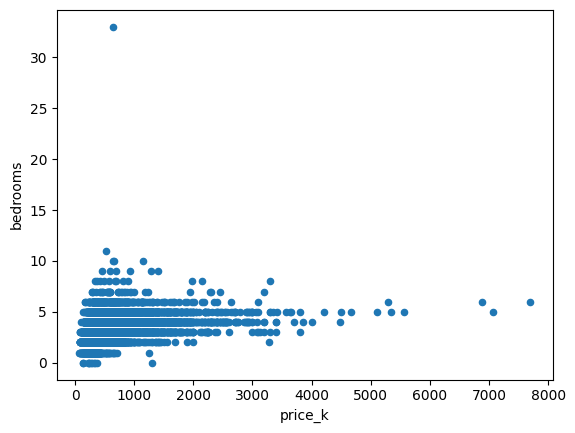

In [8]:
# housing.info()
priced = housing[["lat","long","price", "bedrooms"]]
priced["price_k"] = priced["price"] / 1000
priced["is_rich"] = housing["price"] > 1000000
# plt.figure(figsize=(12,8))
# priced.plot.scatter(x="lat", y="long", c = priced["is_rich"].map({True: "red", False: "blue"}), s = 10)
# counts = priced["price"].value_counts()
priced.plot.scatter(x="price_k", y= "bedrooms")

In [28]:
# Load dataset
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
# scaler = MinMaxScaler(feature_range=(0, 1))
# housing["price"] = scaler.fit_transform(housing[["price"]])
# housing = housing[housing["bedrooms"] < 30] # removes one odd outlier
y = np.log1p(housing["price"])  # Log transform target

X = fixData(housing)
print(X.head())

COLUMNS:  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         4       3.25         3760      4675     2.0           0     0   
1         3       1.75         1460      7800     1.0           0     0   
2         4       1.00         1340      5800     1.5           0     2   
3         3       1.75         1440      8050     1.0           0     0   
4         2       1.50         1780      4750     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      8        2740           1020      2007             0   
1          2      7        1040            420      1979             0   
2          3      7        1340             

In [29]:
# DO NOT RUN MORE THAN ONCE, we want to keep these variables
boostClassList = []
bestClass = None
# best RMSE so far is ~127000
# 1700 n-estimators, 5 depth

In [30]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Create XGBoost regressor
for n in range(1):
    for colsample in range(1):
        n = 1742
        d = 6
        model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse", subsample=0.6,
                            n_estimators=n, max_depth=d, learning_rate=0.01, colsample_bytree=0.7)

        # Train model
        model.fit(X_train, y_train)

        # Make predictions on test set
        y_pred = model.predict(X_test)
        y_non_log_test = np.expm1(y_test)
        y_non_log_pred = np.expm1(y_pred)

        rmse = root_mean_squared_error(y_non_log_test, y_non_log_pred)
        # return from a log of cost to cost
        r2 = r2_score(y_test, y_pred)  # Compute R^2
        r2_non_log = r2_score(y_non_log_test, y_non_log_pred)

        print(f"R² Score: {r2_non_log:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print("estimators: ",n,", depth: ",d)

        boostClass = BoostClass(r2, rmse, n, d, model)
        boostClassList.append(boostClass)
        if (bestClass != None):
            if (boostClass.r2 > bestClass.r2):
                bestClass = boostClass
        else:
            bestClass = boostClass
print("Done!")
# Evaluate performance
print(bestClass.toString())

R² Score: 0.8911
RMSE: 128148.9563
estimators:  1742 , depth:  6
Done!
('r2: ', 0.9058821995518188, ', rmse:', 128148.95630794528, ', n_estimators:', 1742, ', max depth:', 6)


In [31]:
# Load the holdout dataset
holdout_data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')

X_holdout = fixData(holdout_data)

# Predict using the trained model
y_holdout_pred = model.predict(X_holdout)

# Convert predictions back to original scale
y_holdout_pred_original = np.expm1(y_holdout_pred)

# Create DataFrame with correct format
predictions_df = pd.DataFrame({"price": y_holdout_pred_original})


COLUMNS:  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [21]:

# Save in the required format
team_name = "team8"  # Replace with your actual team name
filename = f"{team_name}-module3-predictions.csv"
predictions_df.to_csv(filename, index=False)

print(f"Predictions saved as {filename}")

Predictions saved as team8-module3-predictions.csv


In [32]:
#Take the predictions on the holdout data set and compare them to the actual prices found in this file
actual_df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/refs/heads/master/data/housing_holdout_test_mini_answers.csv")
rmse = root_mean_squared_error(actual_df, predictions_df)
r2 = r2_score(actual_df, predictions_df)
print("RMSE: ", rmse, "| r2: ", r2)

RMSE:  99075.32766431198 | r2:  0.8798636447434708
